# $$Cluster~Hierárquico$$

## $$CONCEITO:$$

- **Técnica Não-Supervisionada (Diagnostica)**


- **Os clusters sao definidos pela distância das variáveis X**


- **Para o agrupamento hierárquico, os pontos de dados reais não são necessários. Somente a matriz de medidas de distância é suficiente, pois o agrupamento é feito com base nas distâncias**


- **Objetivo: Criar Grupos de observações através do cálculo da distância entre os dados, que sejam próximos entre si e diferente entre grupos, dentro do Grupo a variabilidade dos dados dever ser mínima e entre grupo deve ser máxima**



- **Dendrograma** = Gráfico mostra como os grupos se formam conforme o aumento da distancia


- **A definição do número de grupos se dá através da variabilidade entre eles, quanto mais grupos, menor a variabilidade**


- **Método não performa para grande conjunto de dados, pois fica impossível de visualizar o dendrograma** 




-

### $$Distancias(Metricas):$$


**Precisamos saber qual método usar para calcular a distância entre os dados e as principais metricas são:**


- **Euclidiana** = É a distância em linha reta entre dois pontos de dados no espaço euclidiano. Também é chamada de norma L2 ou distância L2.


- **Minkowsky** = Forma generalizada da distância euclidiana e da distância de Manhattan, é normalmente usada com 'p' sendo 1 ou 2, que corresponde à distância de Manhattan e à distância euclidiana, respectivamente.


- **Manhattan** = É a soma das diferenças absolutas de suas coordenadas cartesianas, também é chamada com nomes diferentes, distância L1, norma L1, distância da cobra, distância do quarteirão da cidade, etc 


- **Hamming** = A distância de Hamming entre duas sequências de comprimento igual é o número de posições nas quais os símbolos correspondentes são diferentes. Os dados usados podem ser strings contendo letras, bits ou dígitos decimais, etc.

-

### $$Métodos~De~Agrupamento:$$

**Agora que sabemos as distancias entre todos os pontos de dados, precisamos definir como eles serão agrupados, temos 6 formas para agrupar os dados:**


- **Single Linkage**= Método do vizinho mais próximo, o dado é agrupado pelo grupo que tiver o dado mais próximo a ele


- **Complete Linkage** = Método do vizinho mais longe, o dado é agrupado pelo grupo que tiver o dado mais próximo a ele, porém o dado de comparação para saber qual grupo o ponto vai estar, será o dado com maior distância de cada grupo.

- **Avarage Linkage** = Media , o dado é agrupado pelo grupo que tiver o dado mais próximo a ele, porém é feito uma média de todos os pontos do grupo e o que tiver a menor distância é o grupo escolhido.


- **Centroid Method** = Com um dado no centro de cada clusters, os outros dados são agrupado através dos dados mais próximo a ele, a distância vai ser definida pelo centroide do grupo , que a cada iteração é ajustada conforme vai entrando mais dados no grupo, modificando o dado do centro.


- **Ward's Method** = A escolha se o dado vai fazer parte daquele grupo ou não vai ser definido pelo impacto que aquele dado vai provocar na variabilidade do grupo, buscando sempre a menor variabilidade dentro do grupo

-

### $$Tipo~De~Distribuição:$$


**Variáveis Explicativas**  = Somente variáveis Quantitativas, porém para interpretação dos Clusters podemos adicionar as variáveis categóricas após ter concluído o processo de clusterização)

**OBS1: Não usar Variáveis com Alta Correlação**

**OBS2: Padronizar os dados**

-

### $$Técnicas~Para~Escolha~Do~Numero~De~Clusters:$$


**Coeficiente R²** : Definir o número de grupos quando o R² não aumentar consideravelmente, ou seja, quanto maior o R² melhor o agrupamento.

- **Soma de Quadrados Total(SST)** = **SSR**(variabilidade dentro do grupo) **+** **SSB** (variabilidade entre os grupos)

- **R²** = **SSB** **/** **SST** 


**CCC (Cubic Cluster Critirion)** - Buscar o maior valor do R² antes da queda brusca 

**Elbow** = Soma das variâncias VS Numero de Clusters = Quanto maior o número de clusters menor a variância dentro do grupo.

**Silhoutte** = Verificar se o dado está no grupo certo , calculando a distância media do dado no seu grupo e comparando o valor com outro grupo, se a distância do seu grupo estiver menor então é o grupo certo, quanto maior o S mais correto está a divisão dos dados nos grupos.




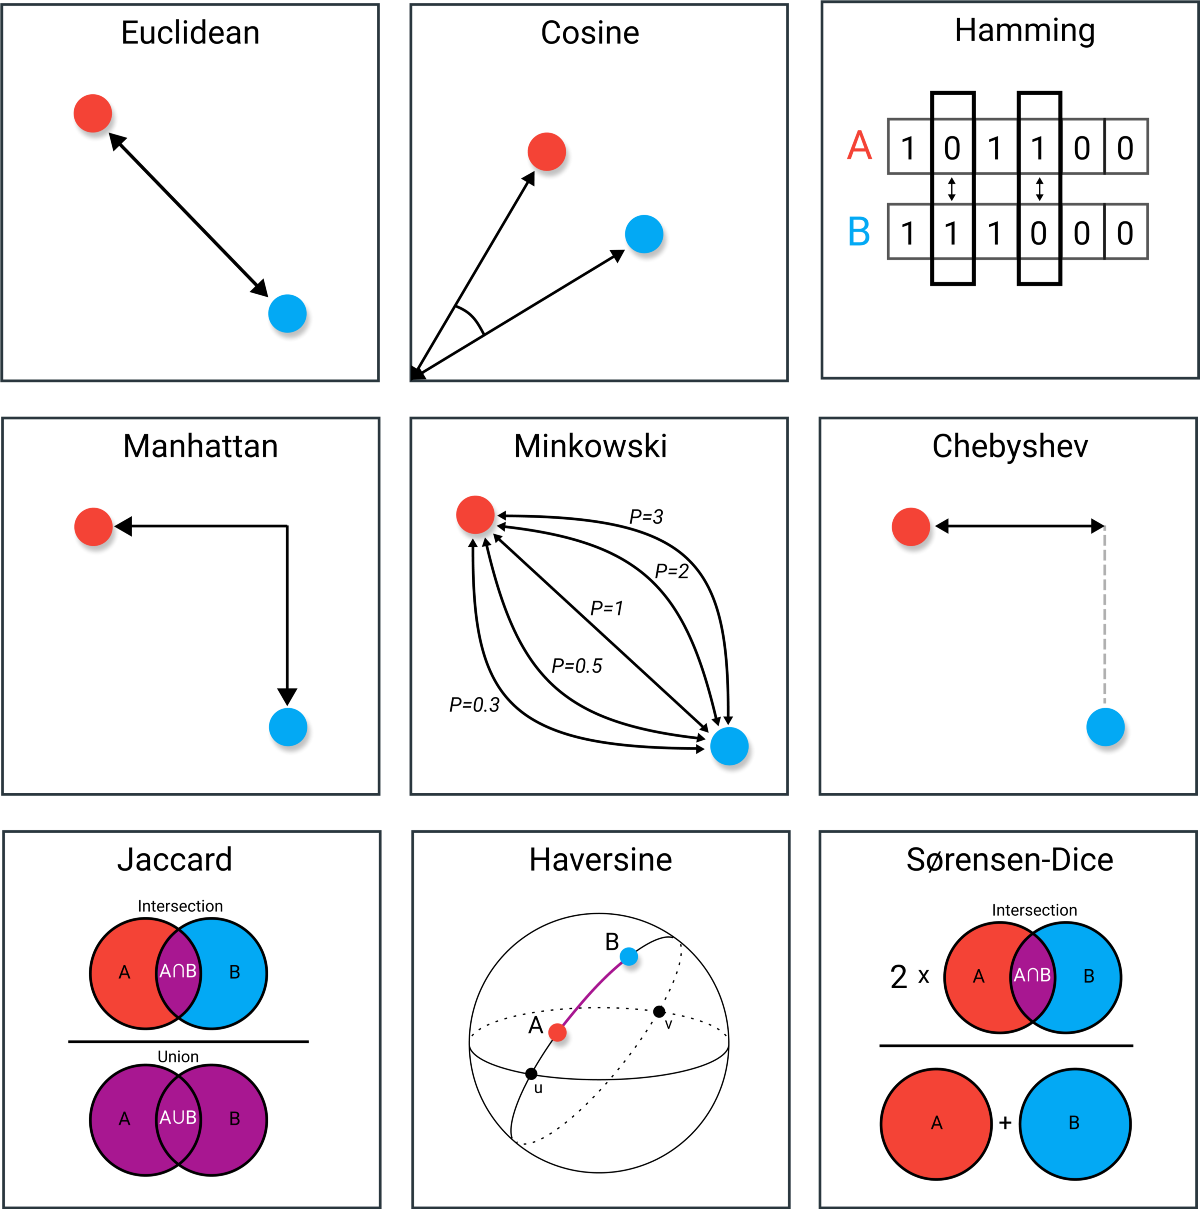

In [1]:
#Distancias
from IPython.display import Image

Image(filename="metric.png")

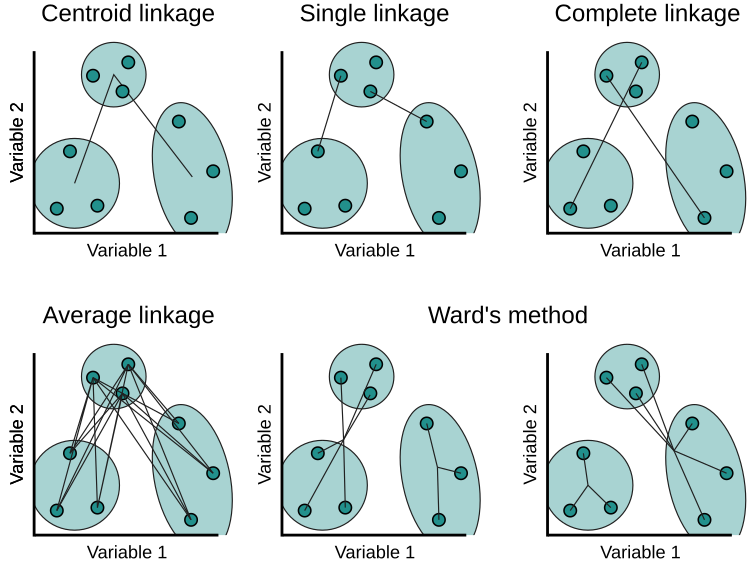

In [2]:
#Agrupamentos
from IPython.display import Image
Image(filename="distancias.png")

## Objetivo: Encontrar os lanches semelhantes do McDonald's com base nas informações nutricionais para uma campanha de marketing

In [3]:
#Pacotes
import pandas as pd
import sklearn.datasets  as dataset
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
from sklearn.neighbors import KNeighborsClassifier
warnings.filterwarnings("ignore")
%matplotlib inline 

# Base de dados

In [4]:
# Carregando o dataset
dados = pd.read_csv('MCDONALDS.csv',encoding='latin1',sep=',')
dados = dados.set_index('Lanche')
print(f'Shape da base de dados: {dados.shape}')
dados.head(5)


Shape da base de dados: (25, 11)


,Valor.Energetico,Carboidratos,Proteinas,Gorduras.Totais,Gorduras.Saturadas,Gorduras.Trans,Colesterol,Fibra.Alimentar,Sodio,Calcio,Ferro
Lanche,,,,,,,,,,,
Big Mac,504,41,25,27.0,12.0,0.5,54,3.5,960,162,6.5
Big Tasty,843,45,41,55.0,24.0,1.7,104,5.1,1511,381,8.2
Quarterao,558,36,31,32.0,16.0,1.3,86,3.6,1216,275,10.0
Mcnifico Bacon,625,38,34,37.0,16.0,1.3,95,3.9,1255,209,11.0
Cheddar McMelt,507,33,29,29.0,14.0,1.2,81,2.9,819,199,10.0


**São 25 variedades de lanches com 11 informações nutricionais**

# Padronizar os dados

In [5]:
#Padronização
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(dados)
dados_padro = scaler.transform(dados)
dados_padro = pd.DataFrame(dados_padro,columns=dados.columns)
dados_padro.index = dados.index
dados_padro.head(5)

,Valor.Energetico,Carboidratos,Proteinas,Gorduras.Totais,Gorduras.Saturadas,Gorduras.Trans,Colesterol,Fibra.Alimentar,Sodio,Calcio,Ferro
Lanche,,,,,,,,,,,
Big Mac,0.061012,-0.039432,-0.226198,0.231040,0.495453,-0.181818,-0.207390,-0.149545,-0.547261,0.135014,0.772999
Big Tasty,2.080827,0.398701,1.187539,2.512109,2.384093,2.090909,1.232820,0.785111,1.001007,2.862701,1.368044
Quarterao,0.382752,-0.587098,0.303953,0.638373,1.125000,1.333333,0.714345,-0.091129,0.172080,1.542451,1.998092
Mcnifico Bacon,0.781949,-0.368032,0.569029,1.045707,1.125000,1.333333,0.973582,0.084119,0.281667,0.720408,2.348119
Cheddar McMelt,0.078886,-0.915698,0.127236,0.393973,0.810227,1.143939,0.570323,-0.500041,-0.943460,0.595856,1.998092


**Como o Método Hierárquico tem como base o cálculo da distância entre os dados, precisamos deixar todos os dados na mesma escala**

## Dendrograma 

**Para construir o Dendrograma precisamos passar 2 parâmetros principais: 'Distancia' e 'Agrupamento' , para esse conjunto de dados vamos definir o Agrupamento como: 'Single Linkage' e a Distancia : 'Euclidean'** 

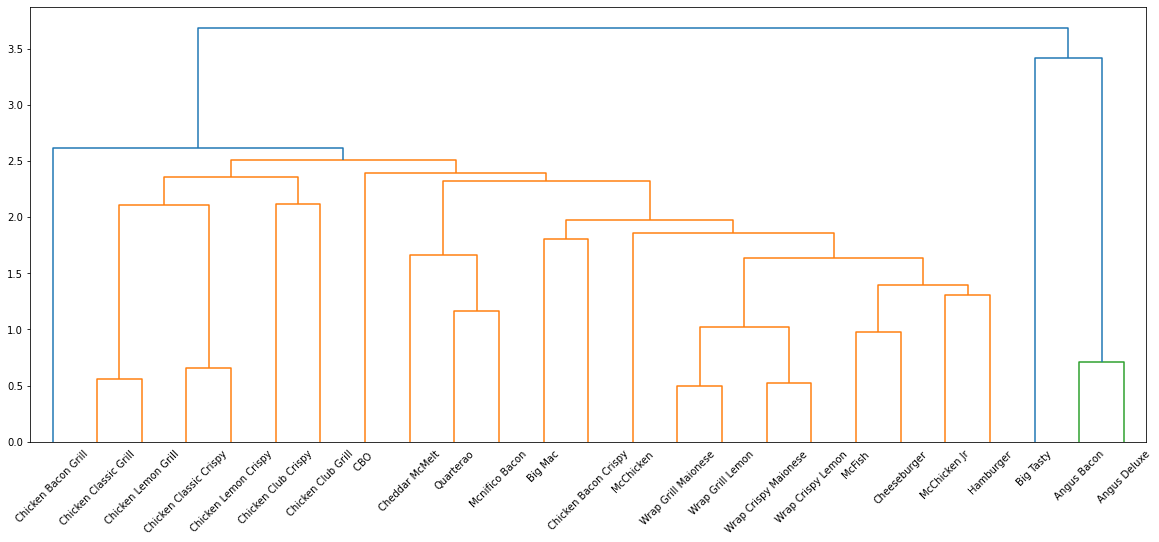

In [6]:
#Gráfico
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(20, 8))
dendrogram(linkage(dados_padro,method='single', metric='euclidean'),labels=dados.index,truncate_mode='level')
plt.show()


**Como podemos perceber, o Método Hierárquico através do gráfico dendrograma mostra todos os grupos formados, precisando apenas definir o ponto de corte, e dependendo da régua traçada podem haver ou não muitos grupos**

# Técnicas para escolha do número de clusters:

# Método Elbow 

- Método não-hierarquico K-Mean para definir o número de grupos 

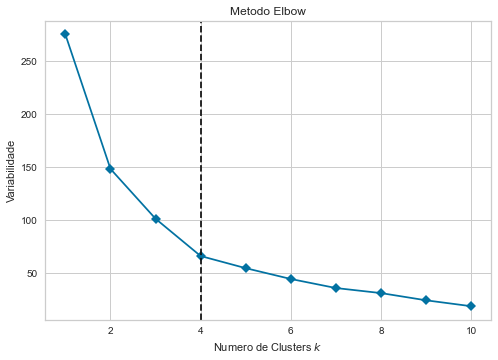

In [7]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,11),timings=False)
visualizer.fit(dados_padro)   
plt.xlabel('Numero de Clusters $k$')
plt.ylabel('Variabilidade')
plt.title('Metodo Elbow')
plt.show()

**Veja que quanto maior o número de clusters, menor o valor da variabilidade dos dados, o Método Elbow neste conjunto de dados indica que 4 clusters é o ideal, porém podemos utilizar outros valores e fazer as comparações**

# Silhouette

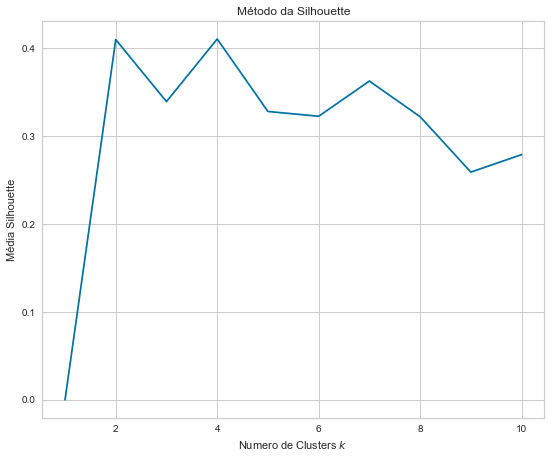

In [8]:
from sklearn.metrics import silhouette_score

scores = [0]
for i in range(2,11):
    fitx = KMeans(n_clusters=i, init='random', n_init=5, random_state=109).fit(dados_padro)
    score = silhouette_score(dados_padro, fitx.labels_)
    scores.append(score)
    
plt.figure(figsize=(9,7.3))
plt.plot(range(1,11), np.array(scores), 'bx-')
plt.xlabel('Numero de Clusters $k$')
plt.ylabel('Média Silhouette')
plt.title('Método da Silhouette')
plt.show()

**O Método da Silhouette indica que o número de clusters igual a 2 ou 4 é o ideal para essa base de dados, porém podemos utilizar outros valores e fazer as comparações**

### Conclusão 1: 

**Após as análises do Dendrograma e dos métodos Elbow e Silhouette vamos definir o número de clusters como sendo 4**

# Criando o modelo de Clusterização Hierárquica

**Hiperparâmetros utilizados:**

- Métrica de distância = Euclidiana

- Método de Agrupamento = Single Linkage

- Número de clusters = 4


In [9]:
#Modelo
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(affinity='euclidean',linkage = 'single',n_clusters=4)
mod = cluster.fit(dados_padro)

In [10]:
#Criar os clusters para cada dado
pred = mod.fit_predict(dados_padro)
dados['Clusters']= pred

# Análise Descritiva dos Clusters

In [13]:
#Fazer a média das variaveis por clusters
media=dados.groupby('Clusters')[dados.columns].mean()
soma= pd.DataFrame(dados.Clusters.value_counts())
media['Numero de Dado agrupado'] = soma
media

,Valor.Energetico,Carboidratos,Proteinas,Gorduras.Totais,Gorduras.Saturadas,Gorduras.Trans,Colesterol,Fibra.Alimentar,Sodio,Calcio,Ferro,Clusters,Numero de Dado agrupado
Clusters,,,,,,,,,,,,,
0,445.333333,40.238095,24.0,20.861905,7.157143,0.447619,50.428571,3.609524,1074.952381,135.571429,4.161429,0.0,21
1,862.000000,56.500000,52.5,47.500000,21.000000,1.700000,142.000000,5.000000,1816.500000,195.000000,3.900000,1.0,2
2,843.000000,45.000000,41.0,55.000000,24.000000,1.700000,104.000000,5.100000,1511.000000,381.000000,8.200000,2.0,1
3,425.000000,31.000000,39.0,16.000000,5.000000,0.400000,83.000000,3.000000,1151.000000,161.000000,3.900000,3.0,1


**Encontramos 4 grupos diferentes: Grupo com mais calorias, grupo com menos calorias, entre outros, porém os clusters 1, 2 e 3 tem apenas 1 ou 2 dados cada, podendo ser considerados os lanches que mais difere dos outros quando comparamos os atributos calóricos entre eles, já o cluster 0 tem 21 dados que podem ser considerados iguais**

In [12]:
#Vizualizar de forma induvidual os clusters
#Filtrando algumas variáveis
dados[['Carboidratos','Colesterol','Sodio','Clusters']]


,Carboidratos,Colesterol,Sodio,Clusters
Lanche,,,,
Big Mac,41,54,960,0
Big Tasty,45,104,1511,2
Quarterao,36,86,1216,0
Mcnifico Bacon,38,95,1255,0
Cheddar McMelt,33,81,819,0
McFish,38,43,773,0
McChicken,40,49,1068,0
McChicken Jr,33,11,633,0
Chicken Classic Crispy,52,33,1361,0


**Vendo de forma individual, podemos perceber que o lanche Angus se difere dos demais pelo seu alto valor de colesterol e sódio, já o Big Tasty também tem seu alto valor de colesterol e sódio, porém é menor do que o lanche do Angus**

**OBS: Caso tivesse dados categóricos, poderia incluir nesta etapa e interpretá-los junto com os clusters já formados**

## Conclusão:

**Não existe um número correto de agrupamento, o resultado do método não supervisionado é base para SUGESTÕES do que pode ser feito com os dados, e tudo vai depender do seu problema de negócio, escolhemos 4 grupos para esse problema, porém se escolhêssemos 5,6 ou 7 grupos estaríamos certo do mesmo jeito, tudo vai dependendo do objetivo inicial**